# Work on King County data set - Penn Cove

In [10]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches
import gsw

In [6]:
with xr.open_dataset('/ocean/atall/MOAD/grid/mesh_mask202108.nc') as mesh:
    tmask0 = mesh.tmask
    mbathy0 = mesh.mbathy
    long = mesh.nav_lon
    latg = mesh.nav_lat

In [7]:
dKC = pd.read_csv('/ocean/atall/MOAD/Obs/KC_dataset/Whidbey_Basin_CTD_Casts_April2024.csv')
sKC = pd.read_csv('/ocean/atall/MOAD/Obs/KC_dataset/WLRD_Sites_March2024.csv')


/tmp/ipykernel_3526026/1896687564.py:1: DtypeWarning:

Columns (2,3,4,5,22,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.



In [8]:
dKC

,Depth (meters),Locator,CH Qual,DO Qual,NO23 Qual,SA Qual,Sample Date,Summ Row ID,Up Down,Chlorophyll (µg/L),...,Loaddate,LT_qual,data_row_id,dn_qual,tb_qual,st_qual,sd_qual,pas_qual,pa_qual,Cast Notes
0,1.0,PENNCOVECW,NaN,NaN,NaN,NaN,02/03/2022 12:44:21 PM,NaN,Down,2.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.5,PENNCOVECW,NaN,NaN,NaN,NaN,02/03/2022 12:44:34 PM,NaN,Down,2.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,PENNCOVECW,NaN,NaN,NaN,NaN,02/03/2022 12:44:38 PM,NaN,Down,2.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.5,PENNCOVECW,NaN,NaN,NaN,NaN,02/03/2022 12:44:41 PM,NaN,Down,2.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,PENNCOVECW,NaN,NaN,NaN,NaN,02/03/2022 12:44:44 PM,NaN,Down,2.44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125774,3.0,SARATOGARP,NaN,NaN,NaN,NaN,02/13/2024 09:07:33 AM,NaN,Up,1.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125775,2.5,SARATOGARP,NaN,NaN,NaN,NaN,02/13/2024 09:07:35 AM,NaN,Up,1.81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125776,2.0,SARATOGARP,NaN,NaN,NaN,NaN,02/13/2024 09:07:38 AM,NaN,Up,2.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125777,1.5,SARATOGARP,NaN,NaN,NaN,NaN,02/13/2024 09:07:40 AM,NaN,Up,2.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/tmp/ipykernel_3526026/639446701.py:4: UserWarning:

linewidths is ignored by contourf



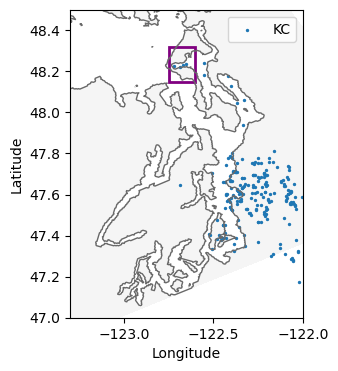

In [11]:
lon1, lon2 = (-122.75, -122.6)
lat1, lat2 = (48.15, 48.32)
fig, ax = plt.subplots(1,1,figsize=(3, 4))
ax.contourf(long, latg, mbathy0[0,:,:], linewidths=1, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(long, latg, mbathy0[0,:,:], linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_ylim([47,48.5])
ax.set_xlim([-123.3,-122])
# plot the location of observations
ax.scatter(sKC.Longitude, sKC.Latitude, s=2, label="KC")
ax.legend()
left, bottom, width, height = (lon2, lat1, lon1-lon2, lat2-lat1)
rect=mpatches.Rectangle((left,bottom),width,height, 
                    fill=False,
                    color="purple",
                    linewidth=2,
                    label="Puget Sound")
  
plt.gca().add_patch(rect)

In [ ]:
sPC = sKC[ sKC['Longitude'].between(lon1, lon2) & sKC['Latitude'].between(lat1, lat2) ]
sPC

,SiteName,Locator,Latitude,Longitude,Site Type,Area,New Georeferenced Column
54,Penn Cove - ECY PNN001,PENNCOVEPNN001,48.2300,-122.670,Marine Offshore,Whidbey,POINT (-122.67 48.23)
99,Penn Cove - Coupeville wharf,PENNCOVECW,48.2230,-122.688,Marine Offshore,Whidbey,POINT (-122.688 48.223)
111,Penn Cove entrance,PENNCOVEENT,48.2370,-122.655,Marine Offshore,Whidbey,POINT (-122.655 48.237)
212,Penn Cove - west end,PENNCOVEWEST,48.2249,-122.720,Marine Offshore,Whidbey,POINT (-122.72 48.2249)


In [45]:
# Put coordonates in dataframe --- matching with model
Lat=dict()
Lon=dict()
for i in range(0,len(dKC.Locator)):
    if dKC.Locator[i]=='PENNCOVEPNN001':
        Lat[i] = 48.2300
        Lon[i] = -122.670
    elif dKC.Locator[i]=='PENNCOVECW':
        Lat[i] = 48.2230
        Lon[i] = -122.688
    elif dKC.Locator[i]=='PENNCOVEENT':
        Lat[i] = 48.2370
        Lon[i] = -122.655
    elif dKC.Locator[i]=='PENNCOVEWEST':
        Lat[i] = 48.2249
        Lon[i] = -122.720
dKC['Lat']=Lat
dKC['Lon']=Lon

In [74]:
obsPC = dKC[ dKC['Lon'].between(lon1, lon2) & dKC['Lat'].between(lat1, lat2) ]

In [75]:
obsPC['dtUTC']=pd.to_datetime(obsPC['Sample Date'])
obsPC['DO']=obsPC['Dissolved Oxygen (mg/L)']*0.7*44.661
obsPC['SA']=gsw.SR_from_SP(obsPC['Salinity (PSU)'])
obsPC = obsPC.rename(columns={"Depth (meters)": "Z", "DO": "Oxygen_Dissolved",
                              "Temperature (°C)": "Temp", "Salinity (PSU)":"SA"}) 

/tmp/ipykernel_3485208/2440881773.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_3485208/2440881773.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_3485208/2440881773.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [76]:
obsPC

,Z,Locator,CH Qual,DO Qual,NO23 Qual,SA Qual,Sample Date,Summ Row ID,Up Down,Chlorophyll (µg/L),...,st_qual,sd_qual,pas_qual,pa_qual,Cast Notes,Lat,Lon,dtUTC,Oxygen_Dissolved,SA
0,1.0,PENNCOVECW,NaN,NaN,NaN,NaN,02/03/2022 12:44:21 PM,NaN,Down,2.18,...,NaN,NaN,NaN,NaN,NaN,48.2230,-122.688,2022-02-03 12:44:21,318.285549,19.231158
1,1.5,PENNCOVECW,NaN,NaN,NaN,NaN,02/03/2022 12:44:34 PM,NaN,Down,2.33,...,NaN,NaN,NaN,NaN,NaN,48.2230,-122.688,2022-02-03 12:44:34,319.411006,19.243917
2,2.0,PENNCOVECW,NaN,NaN,NaN,NaN,02/03/2022 12:44:38 PM,NaN,Down,2.62,...,NaN,NaN,NaN,NaN,NaN,48.2230,-122.688,2022-02-03 12:44:38,319.098379,19.320376
3,2.5,PENNCOVECW,NaN,NaN,NaN,NaN,02/03/2022 12:44:41 PM,NaN,Down,2.53,...,NaN,NaN,NaN,NaN,NaN,48.2230,-122.688,2022-02-03 12:44:41,318.066710,19.336954
4,3.0,PENNCOVECW,NaN,NaN,NaN,NaN,02/03/2022 12:44:44 PM,NaN,Down,2.44,...,NaN,NaN,NaN,NaN,NaN,48.2230,-122.688,2022-02-03 12:44:44,312.939627,19.634551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119390,2.5,PENNCOVEWEST,NaN,NaN,NaN,NaN,02/13/2024 09:31:52 AM,NaN,Up,2.29,...,NaN,NaN,NaN,NaN,NaN,48.2249,-122.720,2024-02-13 09:31:52,283.896579,21.098823
119391,2.0,PENNCOVEWEST,NaN,NaN,NaN,NaN,02/13/2024 09:31:56 AM,NaN,Up,2.32,...,NaN,NaN,NaN,NaN,NaN,48.2249,-122.720,2024-02-13 09:31:56,286.929061,20.899889
119392,1.5,PENNCOVEWEST,NaN,NaN,NaN,NaN,02/13/2024 09:32:02 AM,NaN,Up,2.45,...,NaN,NaN,NaN,NaN,NaN,48.2249,-122.720,2024-02-13 09:32:02,290.274169,20.708692
119393,1.0,PENNCOVEWEST,NaN,NaN,NaN,NaN,02/13/2024 09:32:23 AM,NaN,Up,2.45,...,NaN,NaN,NaN,NaN,NaN,48.2249,-122.720,2024-02-13 09:32:23,297.120701,20.467560


In [77]:
obsPC.to_csv('/ocean/atall/MOAD/Obs/KC_dataset/Penncove_2022-2024.csv')